# <center>Лабораторна робота №4. <br> Візуальний аналіз даних про пасажирів Титаніку</center>

**Заповніть код в клітинках замість "Ваш код тут"**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Зчитуємо навчальну вибірку.**

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [2]:
# шлях до папки з даними
data_folder = 'data/'

In [3]:
train_df = pd.read_csv( data_folder+'/titanic_train.csv', index_col='PassengerId' )

In [6]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Відкинемо ознаку `Cabin`, а потім – всі рядки, де є пропуски.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності ознак `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas чи `pairplot` Seaborn).**

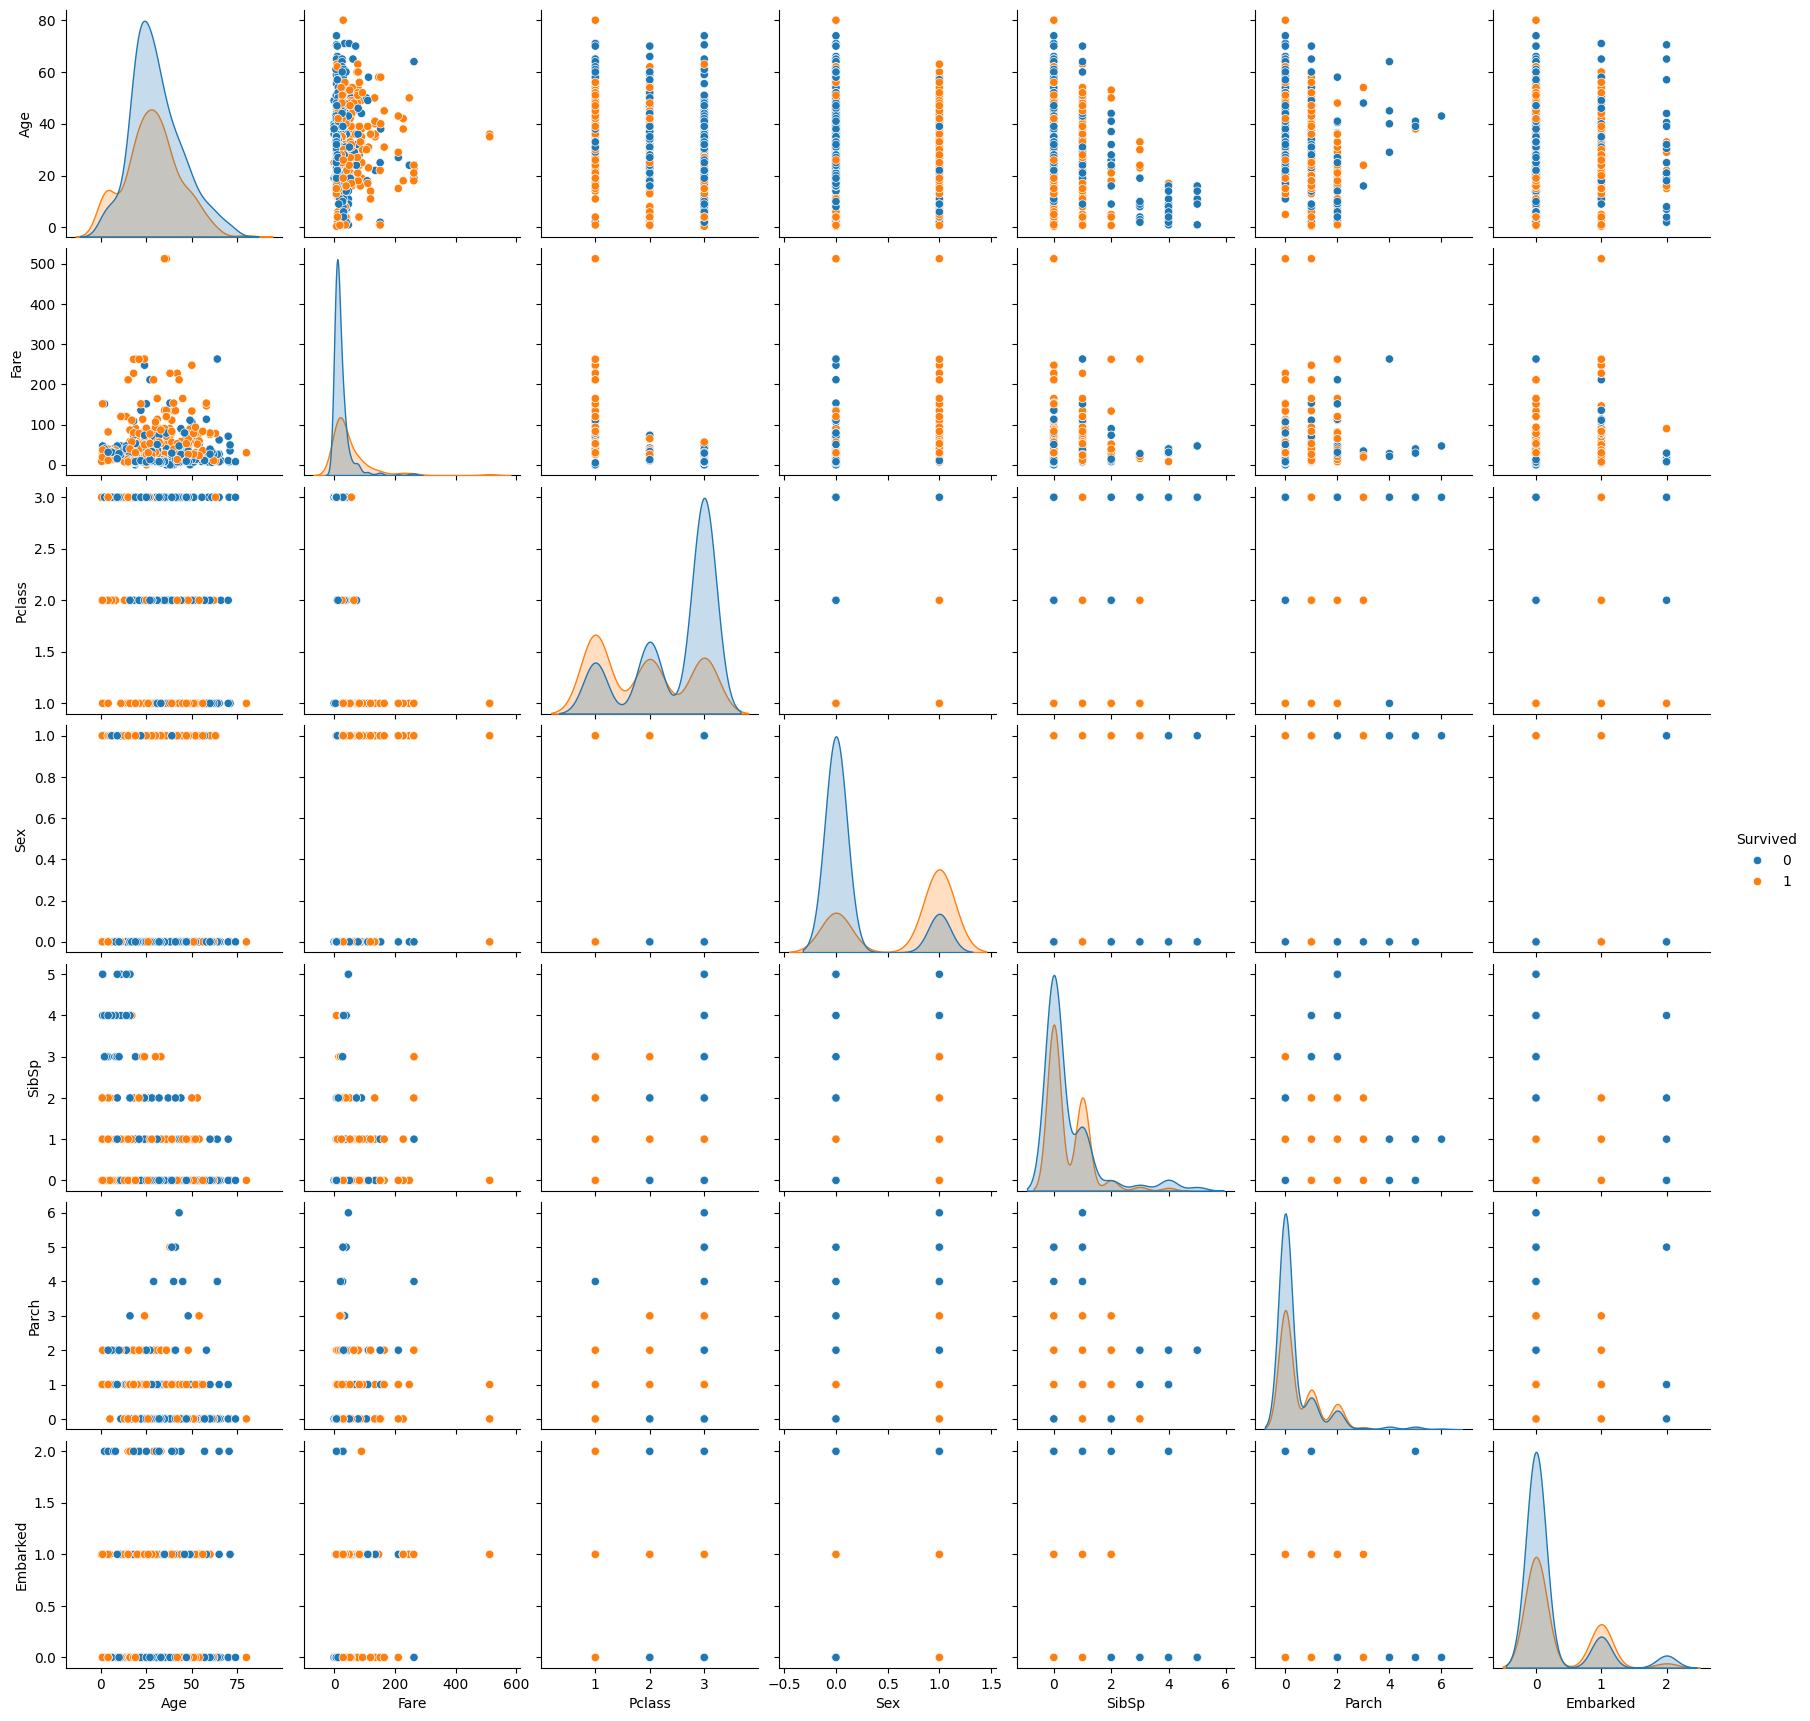

In [14]:
# Ваш код тут
# Выбрать необходимые признаки
features = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
df_selected = train_df[features]

# Закодувати колонку 'Sex'
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

# Закодувати колонку 'Embarked'
df_selected.loc[:, 'Embarked'] = df_selected['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Додати hue за признаком 'Survived', щоб розрізняти виживших та не виживших 
sns.pairplot(df_selected, hue='Survived')
plt.show()

**Як плата за білет (`Fare`) залежить від класу каюти (`Pclass`)? Побудуйте boxplot.**

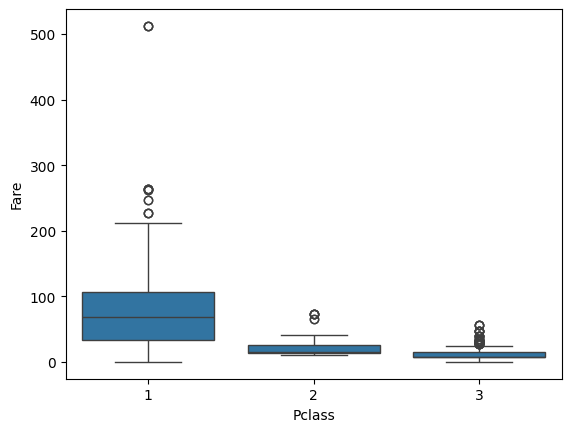

In [15]:
# Ваш код тут
df_selected = train_df[['Pclass', 'Fare']]

# Побудова boxplot
sns.boxplot(x='Pclass', y='Fare', data=df_selected)

# Показати графік
plt.show()

З цих "ящиків з вусами" ми можемо бачити що найдорожчі білети І класу і дешевші ІІІ класу, також ми бачемо наявність outlayers на цьому графіку

**Такий boxplot виходить не дуже красивим із-за викидів.** 

**Опціонально: створіть ознаку `Fare_no_out` (вартість без викидів), в якій виключається вартість, що відрізняється від середнього по класу більш ніж на 2 стандартних відхилення. Важливо: потрібно виключити викиди саме в залежності від класу каюти. Інакше виключатися будуть тільки найбільші (1 клас) і малі (3 клас) вартості.**

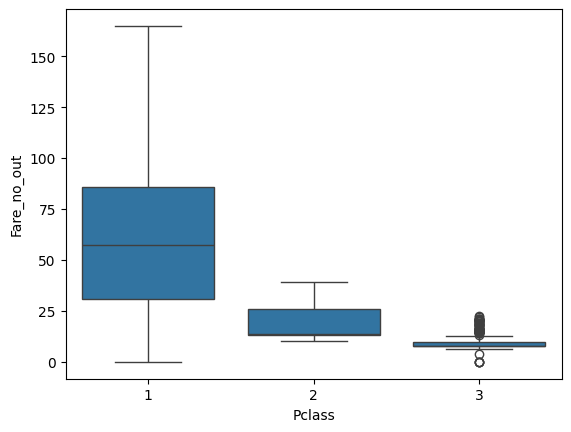

In [32]:
train_df['Fare_no_out'] = train_df['Fare']

fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

# Виключаємо викиди для класу Pclass = 1 на основі 1.0 межквартильного розмаху
fare_pclass1_no_out = fare_pclass1[
    (fare_pclass1 >= fare_pclass1.quantile(0.25) - 1.0 * (fare_pclass1.quantile(0.75) - fare_pclass1.quantile(0.25))) & 
    (fare_pclass1 <= fare_pclass1.quantile(0.75) + 1.0 * (fare_pclass1.quantile(0.75) - fare_pclass1.quantile(0.25)))
]

# Виключаємо викиди для класу Pclass = 2 на основі 1.0 межквартильного розмаху
fare_pclass2_no_out = fare_pclass2[
    (fare_pclass2 >= fare_pclass2.quantile(0.25) - 1.0 * (fare_pclass2.quantile(0.75) - fare_pclass2.quantile(0.25))) & 
    (fare_pclass2 <= fare_pclass2.quantile(0.75) + 1.0 * (fare_pclass2.quantile(0.75) - fare_pclass2.quantile(0.25)))
]

# Виключаємо викиди для класу Pclass = 3 на основі 1.0 межквартильного розмаху
fare_pclass3_no_out = fare_pclass3[
    (fare_pclass3 >= fare_pclass3.quantile(0.25) - 1.0 * (fare_pclass3.quantile(0.75) - fare_pclass3.quantile(0.25))) & 
    (fare_pclass3 <= fare_pclass3.quantile(0.75) + 1.0 * (fare_pclass3.quantile(0.75) - fare_pclass3.quantile(0.25)))
]

train_df['Fare_no_out'] = pd.concat([fare_pclass1_no_out, fare_pclass2_no_out, fare_pclass3_no_out])

# Побудова boxplot без викидів (на основі 1.0 IQR)
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

# Показати графік
plt.show()

оскільки дисперція вартості квитків в 3 класі менша, то ми все бачимо наявність аутлейерів, що їх позбутися потрібно зменшувати межквартильний інтервал ...

**Яке відношення загиблих і виживших в залежності від статі? Відобразіть з допомогою Seaborn.countplot з аргументом hue.**

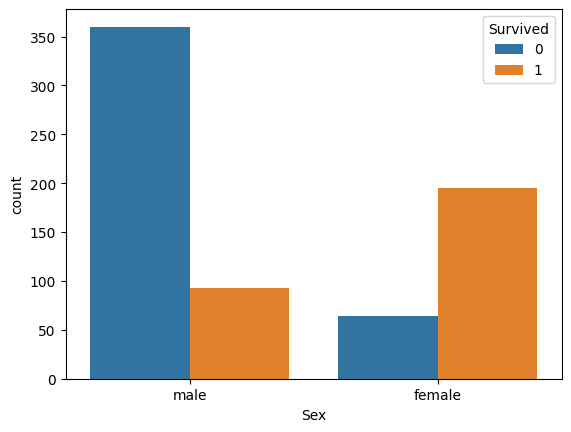

In [33]:
# Ваш код тут
# Побудова countplot з розбивкою за статтю та виживанням
sns.countplot(x='Sex', hue='Survived', data=train_df)

# Показуємо графік
plt.show()

З цієї гістограми ми можемо бачити, що серед чоловіків більше загиблих ніж виживших, в той час як у жінок більша кількість серед виживших, також жінок більше вижило ніж чоловіків. 
Крім того можна зазначити що жінок загинуло значно менше ніж чоловіків.

**Яке співідношення загиблих і виживших в залежності від класу каюти? Відобразівть за допомогою Seaborn.countplot з аргументом hue.**

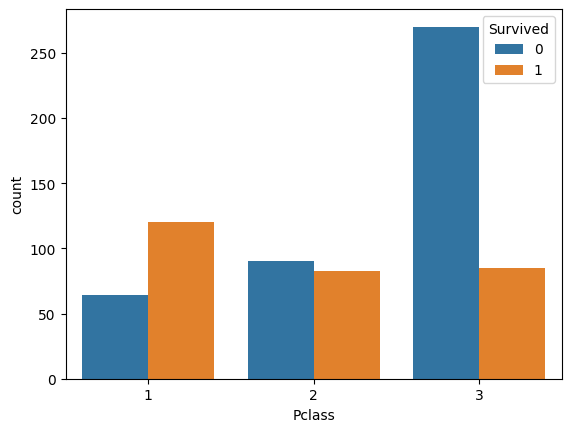

In [34]:
# Ваш код тут
# Побудова countplot з розбивкою за класом каюти і виживанням
sns.countplot(x='Pclass', hue='Survived', data=train_df)

# Показуємо графік
plt.show()

З вищевказаного графіку видно, що більше всього загинуло людей 3 класу, більше ніж в 2 рази менша кількість загиблих 2 класу та ще менше 3 класу.
Вижило людей 2 та 3 класуу приблизно однаково в той час як сама велика кількість виживших людей серед людей 1 класу.

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодші 30 років, похилого віку – старші 60 років.**

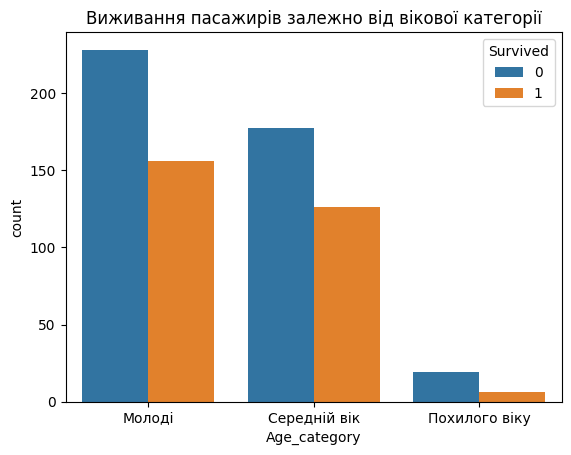

In [35]:
# Ваш код тут
# Додавання вікової категорії
def age_category(age):
    if age < 30:
        return 'Молоді'
    elif age >= 60:
        return 'Похилого віку'
    else:
        return 'Середній вік'

# Створюємо нову колонку з категоріями віку
train_df['Age_category'] = train_df['Age'].apply(age_category)

# Побудова countplot з розбивкою за категоріями віку і виживанням
sns.countplot(x='Age_category', hue='Survived', data=train_df)

# Додаємо заголовок для графіка
plt.title('Виживання пасажирів залежно від вікової категорії')

# Показуємо графік
plt.show()

Відповідно до нашої вікової класифікації, ми можемо бачити що дійсно частіше виживали молоді.